In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.colors as colors
import matplotlib.colors as mcolors
import random
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Анастасия
df = pd.read_csv('/content/drive/MyDrive/data/players_20.csv')

In [55]:
# Алексей
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MEVD/players_20.csv')

In [56]:
df.sample(5)

sofifa_id                                         player_url  \
4266      205970  https://sofifa.com/player/205970/jed-wallace/2...   
7429      194163  https://sofifa.com/player/194163/jukka-raitala...   
2217      228650  https://sofifa.com/player/228650/francisco-ger...   
15309     247403  https://sofifa.com/player/247403/rodrigo-cabre...   
15017     239358  https://sofifa.com/player/239358/seny-dieng/20...   

               short_name           long_name  age         dob  height_cm  \
4266           J. Wallace         Jed Wallace   25  1994-03-26        178   
7429           J. Raitala       Jukka Raitala   30  1988-09-15        181   
2217   Francisco Geraldes  Francisco Geraldes   24  1995-04-18        175   
15309          R. Cabrera     Rodrigo Cabrera   30  1989-05-02        187   
15017            S. Dieng          Seny Dieng   24  1994-11-23        187   

       weight_kg  nationality              club  ...   lwb   ldm   cdm   rdm  \
4266          70      England          Millwall  ...  60+2  57+2  57+2  57+2   
7429          77      Finland   Montreal Impact  ...  66+2  67+2  67+2  67+2   
2217          62     Portugal        AEK Athens  ...  60+2  57+2  57+2  57+2   
15309         75      Uruguay       CD Cobresal  ...  51+2  52+2  52+2  52+2   
15017         74  Switzerland  Doncaster Rovers  ...   NaN   NaN   NaN   NaN   

        rwb    lb   lcb    cb   rcb    rb  
4266   60+2  58+2  51+2  51+2  51+2  58+2  
7429   66+2  66+2  67+2  67+2  67+2  66+2  
2217   60+2  57+2  49+2  49+2  49+2  57+2  
15309  51+2  53+2  59+2  59+2  59+2  53+2  
15017   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 104 columns]

Далее мы удалем признаки, которые не будем использовать в анализе или признаки, значение которых можно получить из других.

In [57]:
df = df.drop(columns = ['player_url', 'long_name', 'real_face', 'release_clause_eur', 'player_tags', 'loaned_from', 'player_traits', 
                   'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_reflexes', 'goalkeeping_positioning', 'ls', 'st', 'rs', 'lw', 
                   'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 
                   'lb', 'lcb', 'cb', 'rcb', 'rb'])

In [58]:
df.sample(5)

sofifa_id     short_name  age         dob  height_cm  weight_kg  \
3803      188334  F. Cacciatore   32  1986-10-08        182         85   
16583     235068   H. Gostomski   21  1998-02-25        191         82   
10466     250881    Sergio Ruiz   24  1994-12-16        171         70   
18141     243097    Yin Congyao   22  1997-03-04        182         74   
13645     228889      J. McGing   25  1994-05-22        184         74   

      nationality                                 club  overall  potential  \
3803        Italy                             Cagliari       72         72   
16583      Poland                Jagiellonia Białystok       57         66   
10466       Spain                     Racing Santander       65         69   
18141    China PR  Chongqing Dangdai Lifan FC SWM Team       50         60   
13645   Australia                        Brisbane Roar       62         66   

       ...  power_long_shots  mentality_aggression mentality_interceptions  \
3803   ...                56                    72                      74   
16583  ...                 5                    16                       8   
10466  ...                63                    69                      65   
18141  ...                31                    42                      30   
13645  ...                31                    59                      66   

      mentality_positioning  mentality_vision  mentality_penalties  \
3803                     60                48                   39   
16583                     6                35                   19   
10466                    59                61                   38   
18141                    41                53                   43   
13645                    48                46                   36   

       mentality_composure defending_marking defending_standing_tackle  \
3803                    74                68                        77   
16583                   29                14                        10   
10466                   57                58                        61   
18141                   56                55                        36   
13645                   60                59                        67   

      defending_sliding_tackle  
3803                        77  
16583                       10  
10466                       63  
18141                       43  
13645                       66  

[5 rows x 66 columns]

Немного причесываем датасет :)

In [59]:
df.body_type = np.where(df.body_type == 'Akinfenwa', 'Stocky', 
                        np.where(df.body_type.isin(['Shaqiri', 'Courtois', 'PLAYER_BODY_TYPE_25', 'Neymar', 'C. Ronaldo', 'Messi']), 
                                 'Normal', df.body_type))

In [60]:
df['dob'] = pd.to_datetime(df['dob'])
df['joined'] = pd.to_datetime(df['joined'])

## Описание признаков:

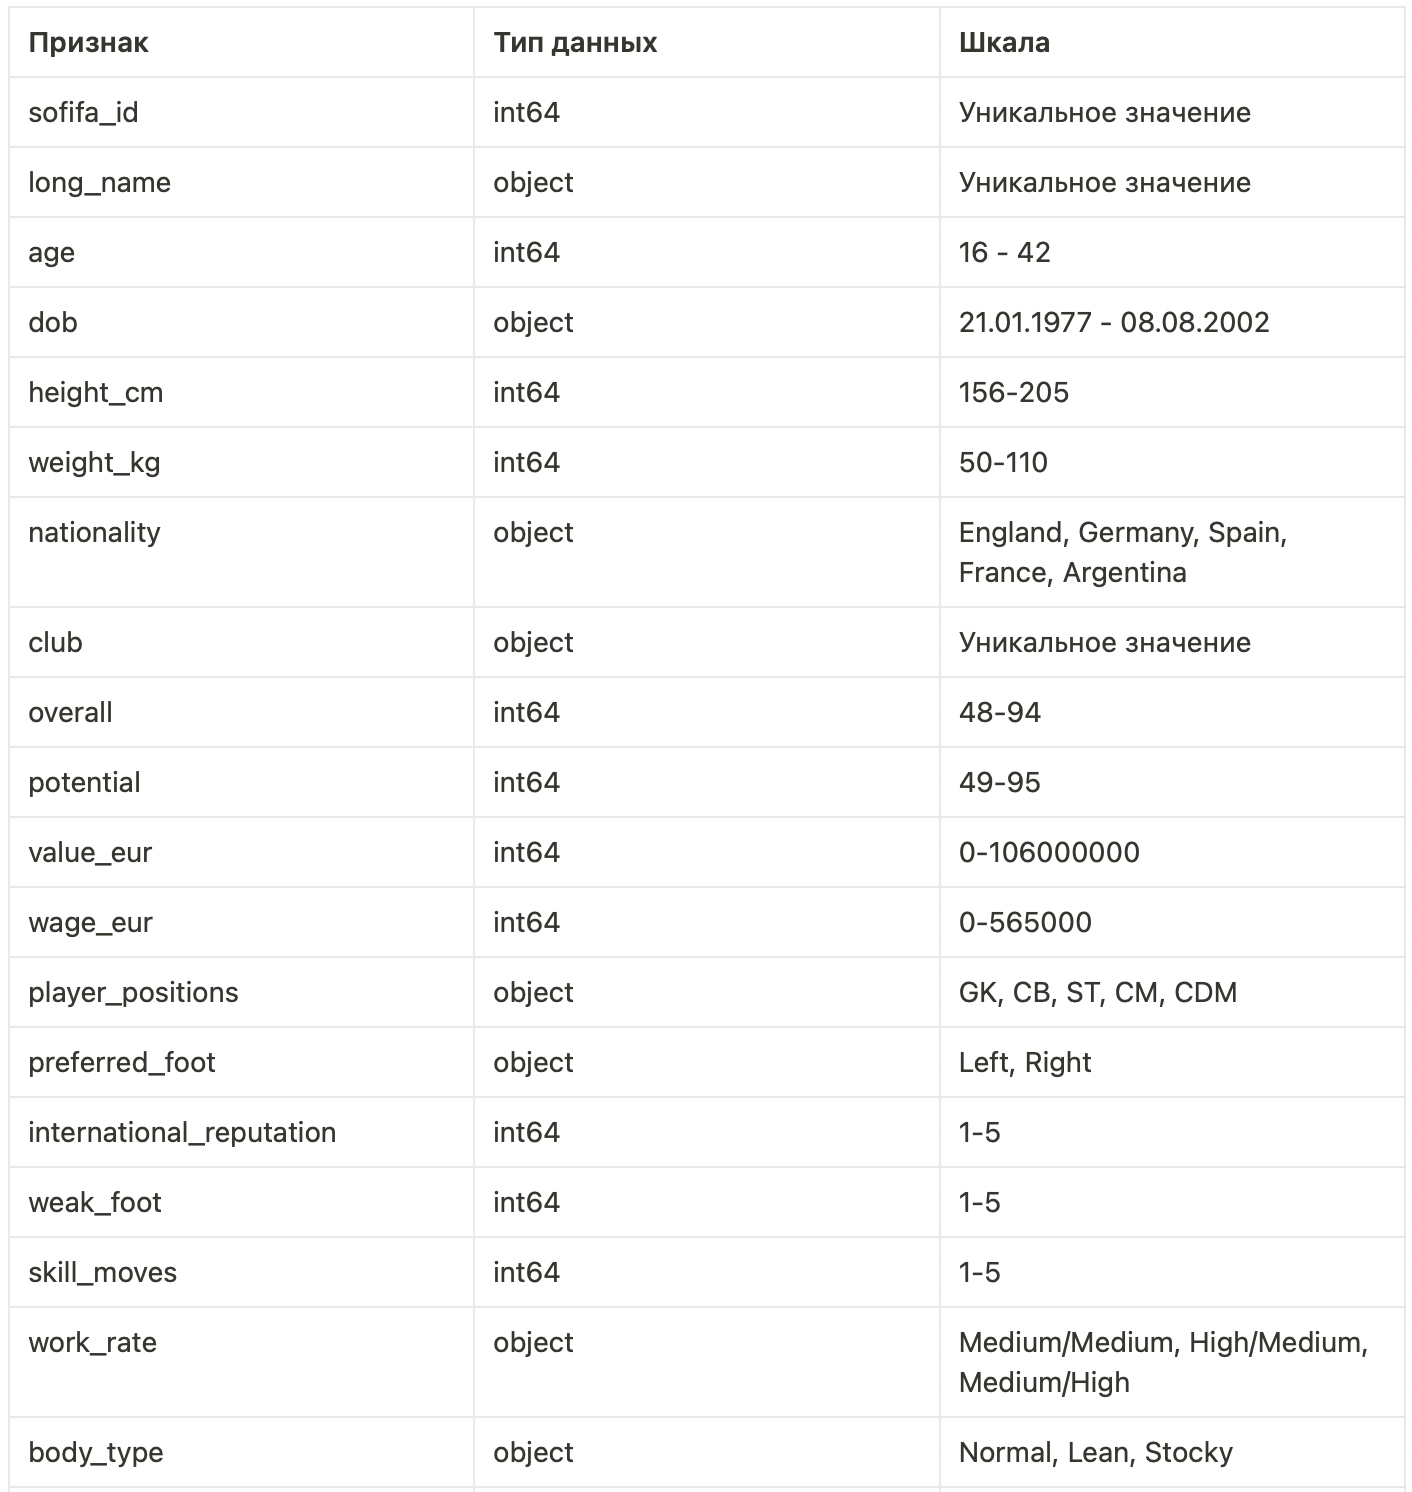

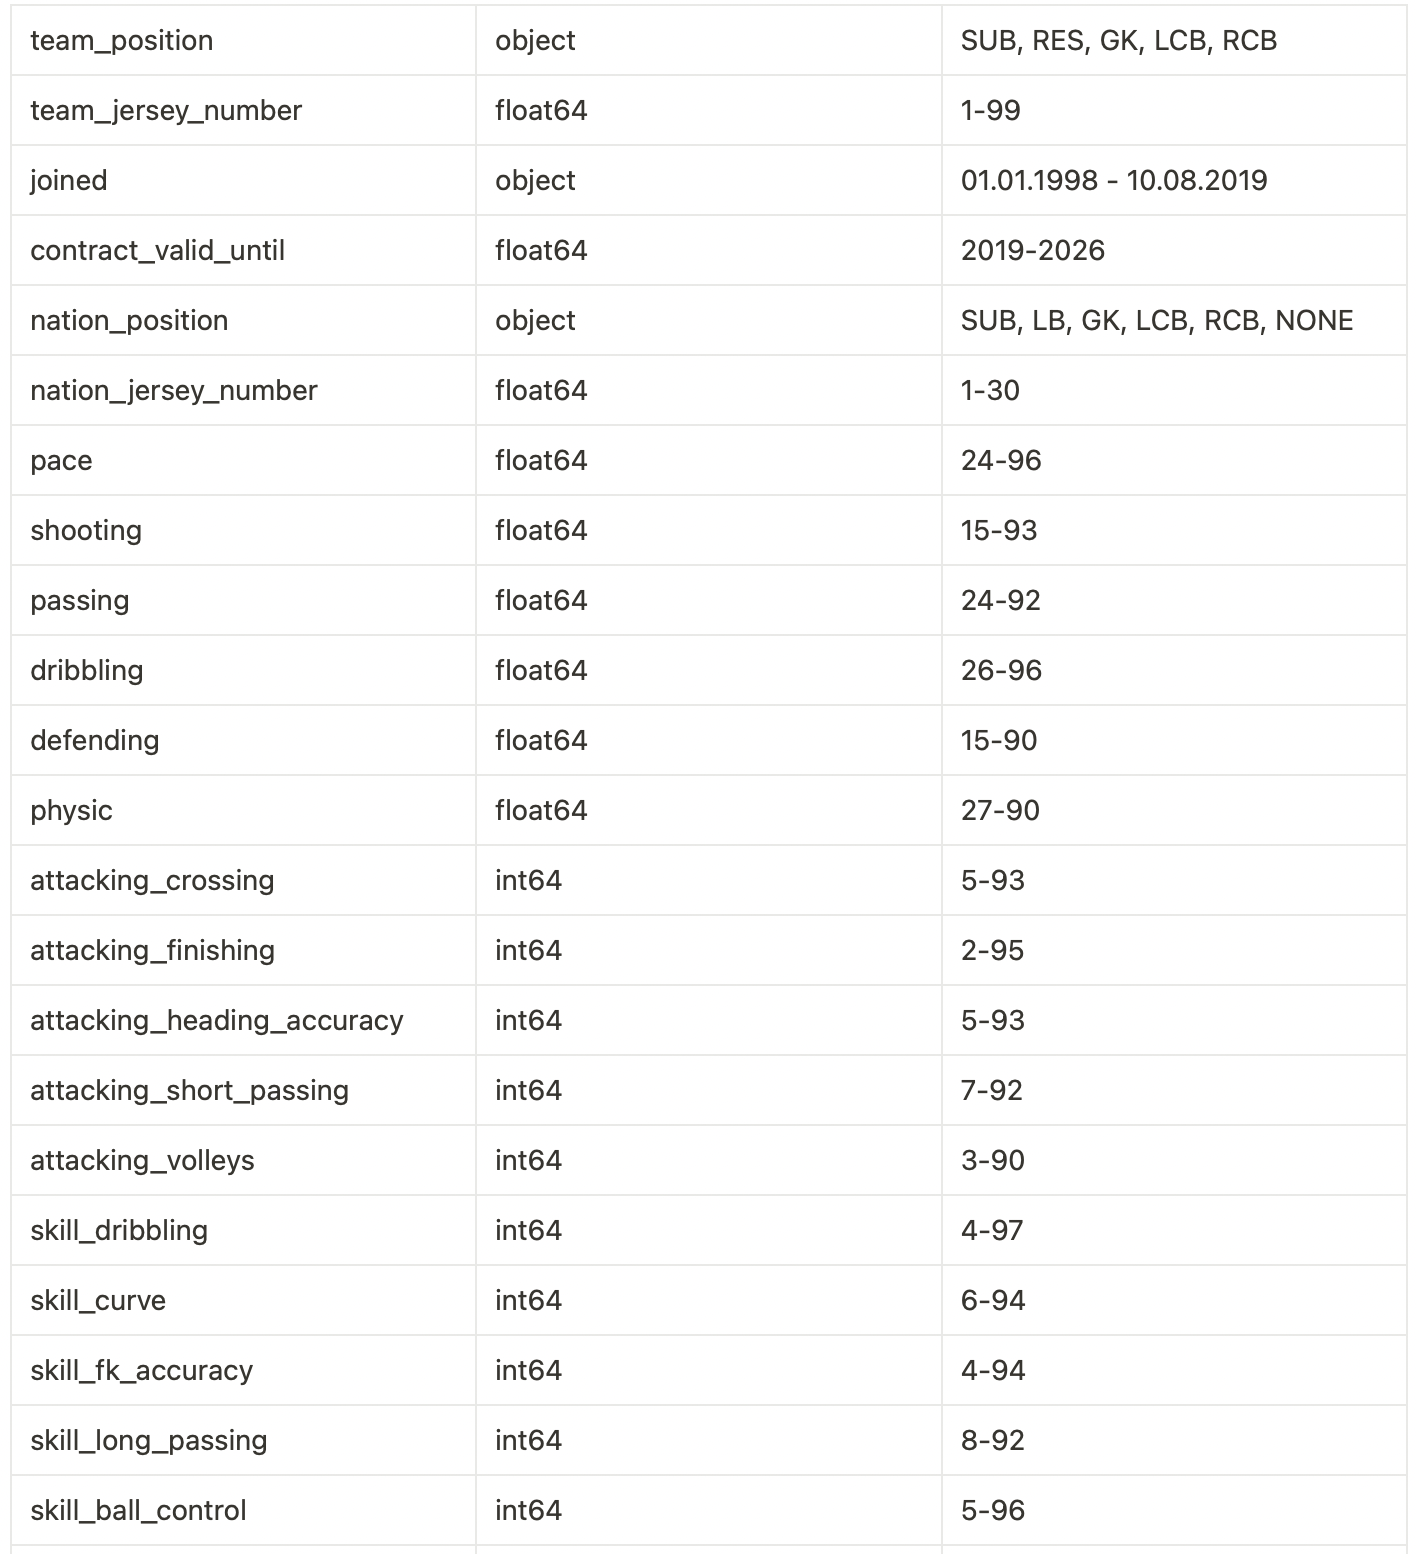

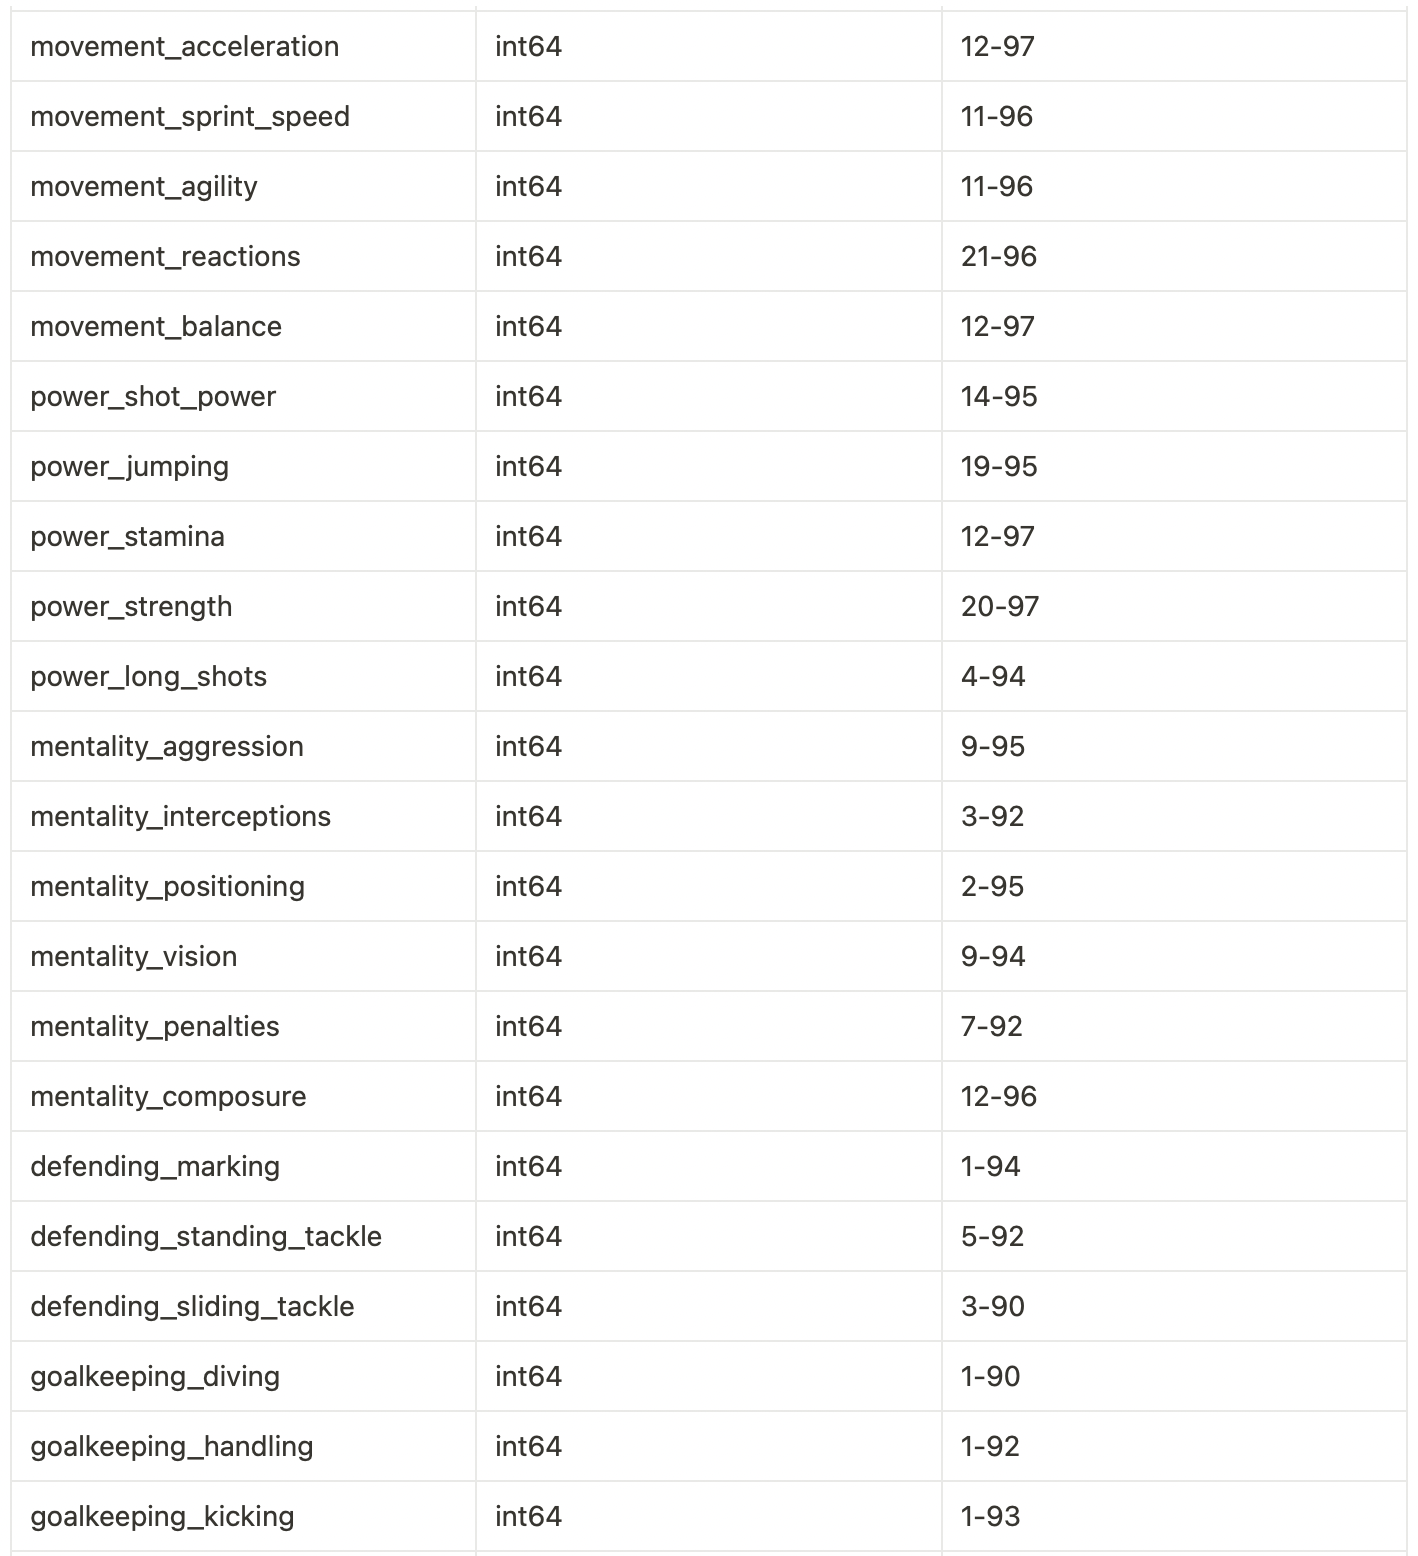

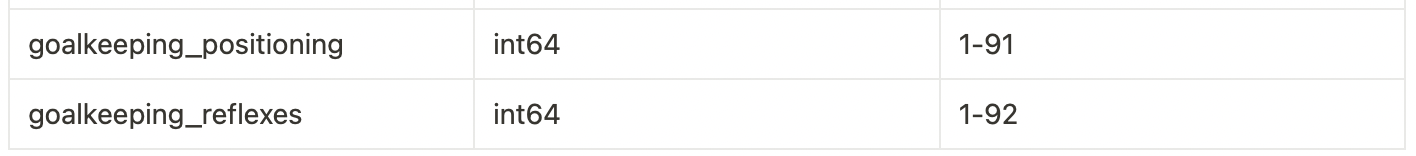

Вероятно, датасет подойдет для оценки игроков в футбол и составления общих рейтингов, поиска корреляции между различными факторами физической подготовки игрока и других показателей. Возможно, для прогнозирования каких-то будущих показателей игрока. 

Датасет не пойдет для прогнозирование результатов матчей, для полной оценки физических характеристик игрока, нет данных о тренировочной программе игрока, не подойдет для прогнозирования стоимости игроков. 

# [Второй датасет](https://www.kaggle.com/datasets/evangower/fifa-world-cup)

In [ ]:
# Анастасия
df_2 = pd.read_csv('/content/drive/MyDrive/data/wcmatches.csv')

In [ ]:
df_2.sample(5)

year       country            city    stage            home_team  \
92   1954   Switzerland           Basel  Group 4          Switzerland   
737  2010  South Africa  Port Elizabeth  Group H                Chile   
648  2006       Germany        Dortmund  Group B  Trinidad and Tobago   
784  2014        Brazil           Natal  Group G                Ghana   
719  2010  South Africa    Johannesburg  Group G               Brazil   

         away_team  home_score  away_score outcome win_conditions  \
92           Italy           4           1       H            NaN   
737    Switzerland           1           0       H            NaN   
648         Sweden           0           0       D            NaN   
784  United States           1           2       A            NaN   
719    North Korea           2           1       H            NaN   

      winning_team  losing_team        date month  dayofweek  
92     Switzerland        Italy  1954-06-23   Jun  Wednesday  
737          Chile  Switzerland  2010-06-21   Jun     Monday  
648            NaN          NaN  2006-06-10   Jun   Saturday  
784  United States        Ghana  2014-06-16   Jun     Monday  
719         Brazil  North Korea  2010-06-15   Jun    Tuesday

## Описание признаков:

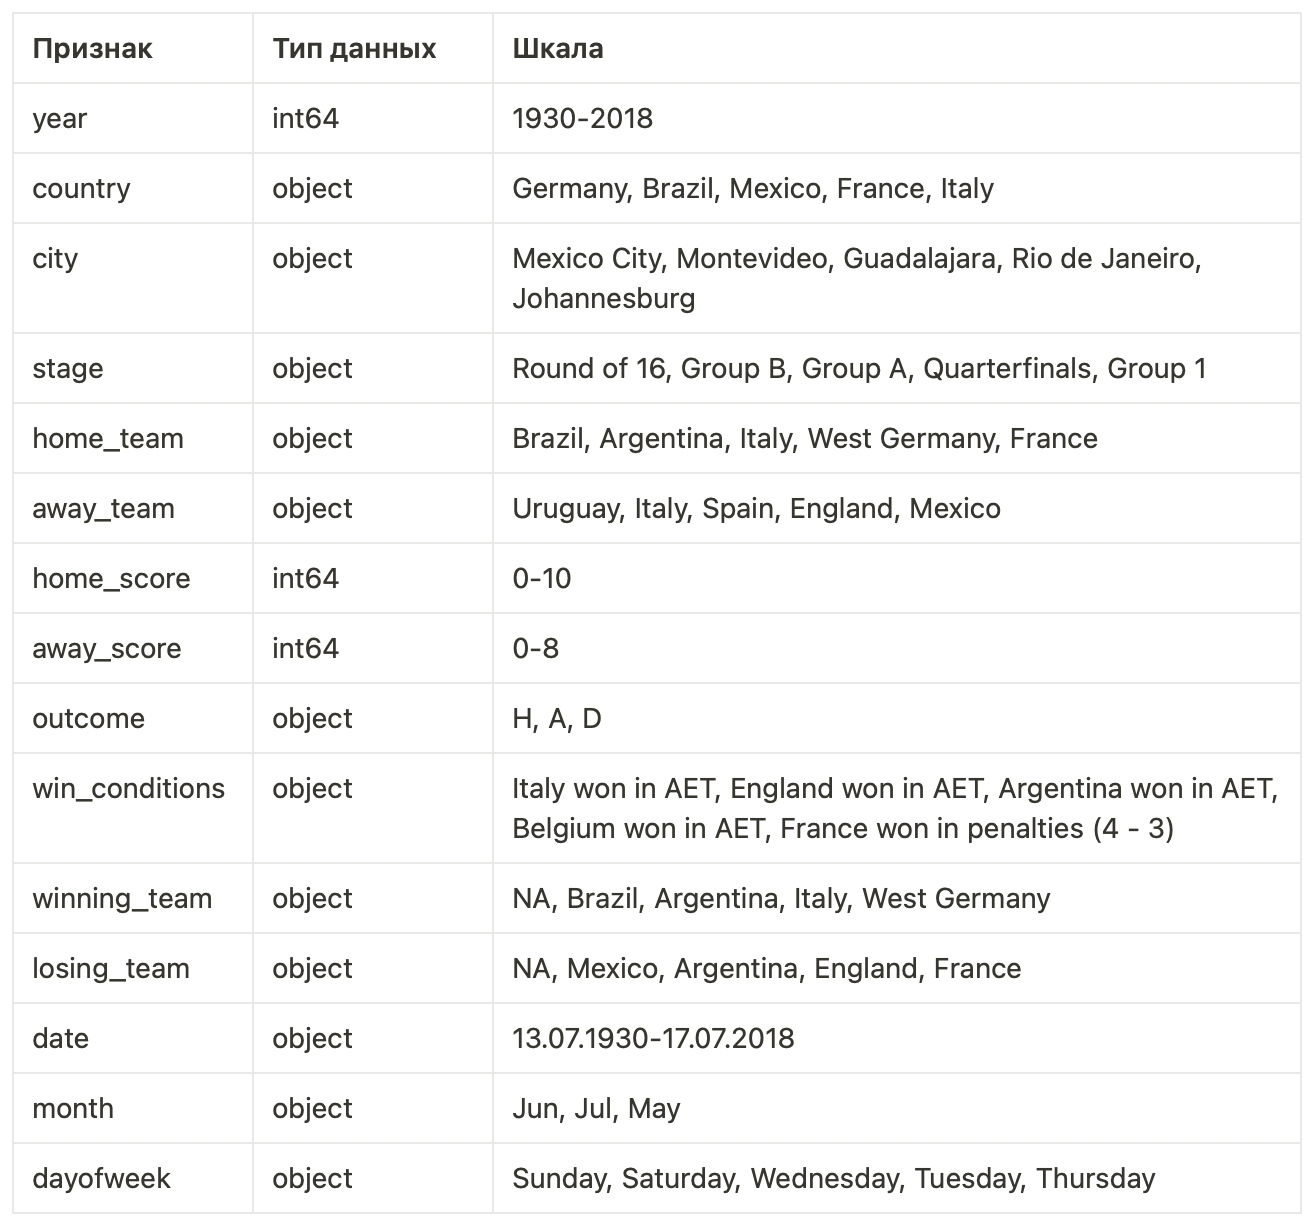

Этот датасет может быть полезным для следующих задач:

1. Анализ результатов и статистики матчей: Датасет предоставляет информацию о счете, победителе, голах, желтых и красных картах и других статистических показателях матчей, что позволяет анализировать прошлые матчи и их результаты.

2. Прогнозирование результатов матчей: Используя исторические данные о матчах, можно создать модель для прогнозирования результатов будущих матчей Чемпионата мира.

3. Исследование производительности команд и игроков.

Однако, этот датасет может не подходить для следующих задач:

1. Анализ индивидуальных игроков и их характеристик: Датасет сконцентрирован на матчах и командах, и не содержит подробной информации о футболистах и их индивидуальных характеристиках.

2. Прогнозирование трансферных стоимостей игроков: Датасет не содержит информации о трансферных стоимостях игроков или их истории трансферов, поэтому он может быть ограничен в использовании для прогнозирования и анализа финансовых аспектов футбольной индустрии.

3. Исследование внеигровых аспектов турнира: Датасет ограничен информацией о матчах и не содержит данных о внеигровых аспектах, таких как организация турнира, стадионы, зрители и другие важные факторы.


# Гипотезы

1. Наибольша зарплата у игроков с высшими показателями.
2. Высокие показатели у более отпытных игроков.
3. Лучшие показатели маневренности у игроков с левой ведущей ногой.
4. Молодные игроки имеют наибольший показатель потенциала.
5. Игроки с высокой международной репутацией входят в сборную страны
6. Показатель слабой ноги у игроков с правой ведущей ногой выше, чем у игроков с левой ведущей.
7. Больше всего игроков в возрасте от 25 до 30 лет.
8. Более опытные игроки лучше контролируют мяч.
9. Вратари с более высокими показателями рефлексов и позиционирования имеют меньше пропущенных голов за сезон.
10. Зависимость успеха фтуболистов от месяца рождения.
11. Футболисты имеют пониженный индекс массы тела.
12. Матрица кореляции возраста и каких то характеристик.
13. Распределение людей по национальности (ну больше всего спортсменов из бразилии, ЮА).
14. Нападающие имееют большее количество забитых голов.
15. Существует разница в показателях футболистов из разных футбольных лиг. Предполагается, что игроки, выступающие в более сильных и престижных лигах, имеют более высокие рейтинги и лучшие статистические показатели.
16. Вратари с более высокими показателями рефлексов и позиционирования имеют меньше пропущенных голов за сезон.
17. Футболисты из определенных стран имеют более высокий средний рейтинг, чем футболисты из других стран. Предполагается, что определенные страны имеют лучшую футбольную культуру и развитую систему подготовки игроков.
18. Футболисты, начавшие свою карьеру в более раннем возрасте, имеют более высокий общий рейтинг.
19. Футболисты, начавшие свою карьеру в более позднем возрасте, имеют более высокий рейтинг физических показателей. Предполагается, что игроки, начавшие карьеру позднее, могут иметь более взрослую физическую основу и лучшую физическую подготовку.
20. Футболисты, начавшие свою карьеру в более молодом возрасте, имеют больше шансов играть за национальную сборную своей страны. Предполагается, что раннее начало карьеры может дать игроку больше опыта и возможности для привлечения внимания сборных команд.
21. Футболисты, начавшие свою карьеру в более позднем возрасте, имеют больше вероятность играть в более сильных и престижных клубах. Предполагается, что игроки, начавшие карьеру позднее, могут иметь больше времени на развитие и привлечение внимания крупных клубов.



# Гипотеза 1. 
## Наибольша зарплата у игроков с высшими показателями.


In [61]:
df_1 = df.copy()
df_1['total_score'] = df_1[['weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing','attacking_finishing', 
                            'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
                            'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 
                            'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
                            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
                            'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 
                            'defending_standing_tackle']].sum(axis=1)
df_1 = df_1.sort_values(by='total_score', ascending=False)

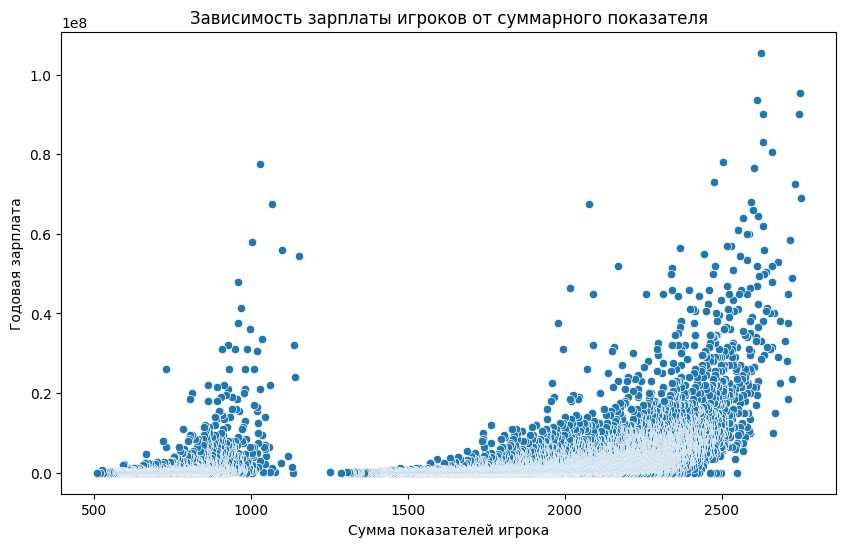

In [62]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_1, x='total_score', y='value_eur')
plt.xlabel('Сумма показателей игрока')
plt.ylabel('Годовая зарплата')
plt.title('Зависимость зарплаты игроков от суммарного показателя')

# Display the plot
plt.show()

# Гипотеза 2. 
## Лучшие показатели маневренности у игроков с левой ведущей ногой.

In [63]:
df_2 = df.copy()
df_2 = df_2.groupby('preferred_foot').agg({'dribbling': 'median'}).reset_index()

In [64]:
x_values = list(df_2.preferred_foot)
y_values = list(df_2.dribbling)

p = figure(x_range=x_values, 
           title="Средний показатель маневренности для разных ведущих ног", 
           x_axis_label='Ведущая нога', 
           y_axis_label='Показатель маневренности')

p.vbar(x=x_values, top=y_values, width=0.5, color='blue')

output_notebook()
show(p)

# Гипотеза 3. 
## Больше всего игроков в возрасте от 25 до 30 лет.

In [65]:
df_3 = df.copy()
df_3 = df_3.groupby('age').agg({'sofifa_id': 'count'}).reset_index()

ages = {}
ages['до 20'] = df_3[df_3.age < 20].sofifa_id.sum()
ages['от 20 до 25'] = df_3[df_3.age.isin(range(20, 25))].sofifa_id.sum()
ages['от 25 до 30'] = df_3[df_3.age.isin(range(25, 30))].sofifa_id.sum()
ages['от 30 до 35'] = df_3[df_3.age.isin(range(30, 35))].sofifa_id.sum()
ages['от 35 до 40'] = df_3[df_3.age.isin(range(35, 40))].sofifa_id.sum()
ages['от 40'] = df_3[df_3.age > 40].sofifa_id.sum()

In [66]:
# fig = px.pie(pd.DataFrame({'age': list(ages.keys()), 'values':list(ages.values())}), 
#              values='values', 
#              names='age',
#              title='Количество игроков по возрастным категориям',
#              color='age')
# fig.update_layout(legend_title_text='Возраст')
# fig.show()

In [67]:
fig = go.Figure(data=[go.Pie(labels=list(ages.keys()), values=list(ages.values()), 
                             pull=[0, 0, 0.2, 0, 0, 0, 0])])
fig.update_layout(legend_title_text='Возраст', title='Количество игроков по возрастным категориям')
fig.show()

# Гипотеза 4. 
## Футболисты имеют пониженный индекс массы тела.

In [68]:
df_5 = df.copy()
df_5.height_cm = df_5.height_cm/100
df_5['body_mass_index'] = df_5.weight_kg / df_5.height_cm**2
df_5.loc[((df_5.body_mass_index >= 16) & (df_5.body_mass_index < 18.5)), 'body_mass'] = 'Недостаточная масса тела'
df_5.loc[((df_5.body_mass_index >= 18.5) & (df_5.body_mass_index < 25)), 'body_mass'] = 'Норма'
df_5.loc[((df_5.body_mass_index >= 25) & (df_5.body_mass_index < 30)), 'body_mass'] = 'Избыточная масса тела'
df_5.loc[((df_5.body_mass_index >= 30) & (df_5.body_mass_index < 35)), 'body_mass'] = 'Ожирение 1-й степени'

In [69]:
fig = px.scatter(df_5, 
                 x="weight_kg", 
                 y="height_cm",
                 size="body_mass_index", 
                 color="body_mass",
                 hover_name="body_mass", 
                 log_x=True, 
                 size_max=35,
                 color_discrete_sequence=["lightgreen", "lightskyblue", "yellow", "lightpink"],
                 title="Весовые показатели игроков",
                 labels={'weight_kg':'Вес, кг', 'height_cm': 'Рост, м'})
fig.update_layout(legend_title_text='Категория индекса массы тела')
fig.show()

# Гипотеза 5. 
## Больше всего игроков из Южно-Африканской Республики.

In [70]:
df_6 = df.copy()
geo = px.data.gapminder().rename(columns={'country': 'nationality'})
df_6 = df_6.groupby('nationality').agg({'sofifa_id': 'count'}).reset_index()
df_6 = df_6.merge(geo, on='nationality', how='left')

In [71]:
def generate_random_color():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)
color_list = []
while len(color_list) < 162:
    color = generate_random_color()
    if color not in color_list:
        color_list.append(color)

In [72]:
fig = px.scatter_geo(df_6, locations="iso_alpha",
                     color="nationality",
                     hover_name="nationality", 
                     size="sofifa_id",
                     projection="natural earth",
                     color_discrete_sequence=color_list,
                     title = 'Распределение игроков по национальности')
fig.update_layout(legend_title_text='Национальность игроков')
fig.show()

# Гипотеза 6. 
## Существует разница в показателях футболистов из разных футбольных клубов.

In [73]:
df_7 = df.copy()
df_7['total_score'] = df_7[['weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','attacking_crossing','attacking_finishing', 
                            'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
                            'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 
                            'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 
                            'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
                            'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 
                            'defending_standing_tackle']].sum(axis=1)
df_7 = df_7.groupby('club').agg({'total_score': 'sum'}).reset_index()
df_7 = df_7.sort_values(by='total_score', ascending=False)

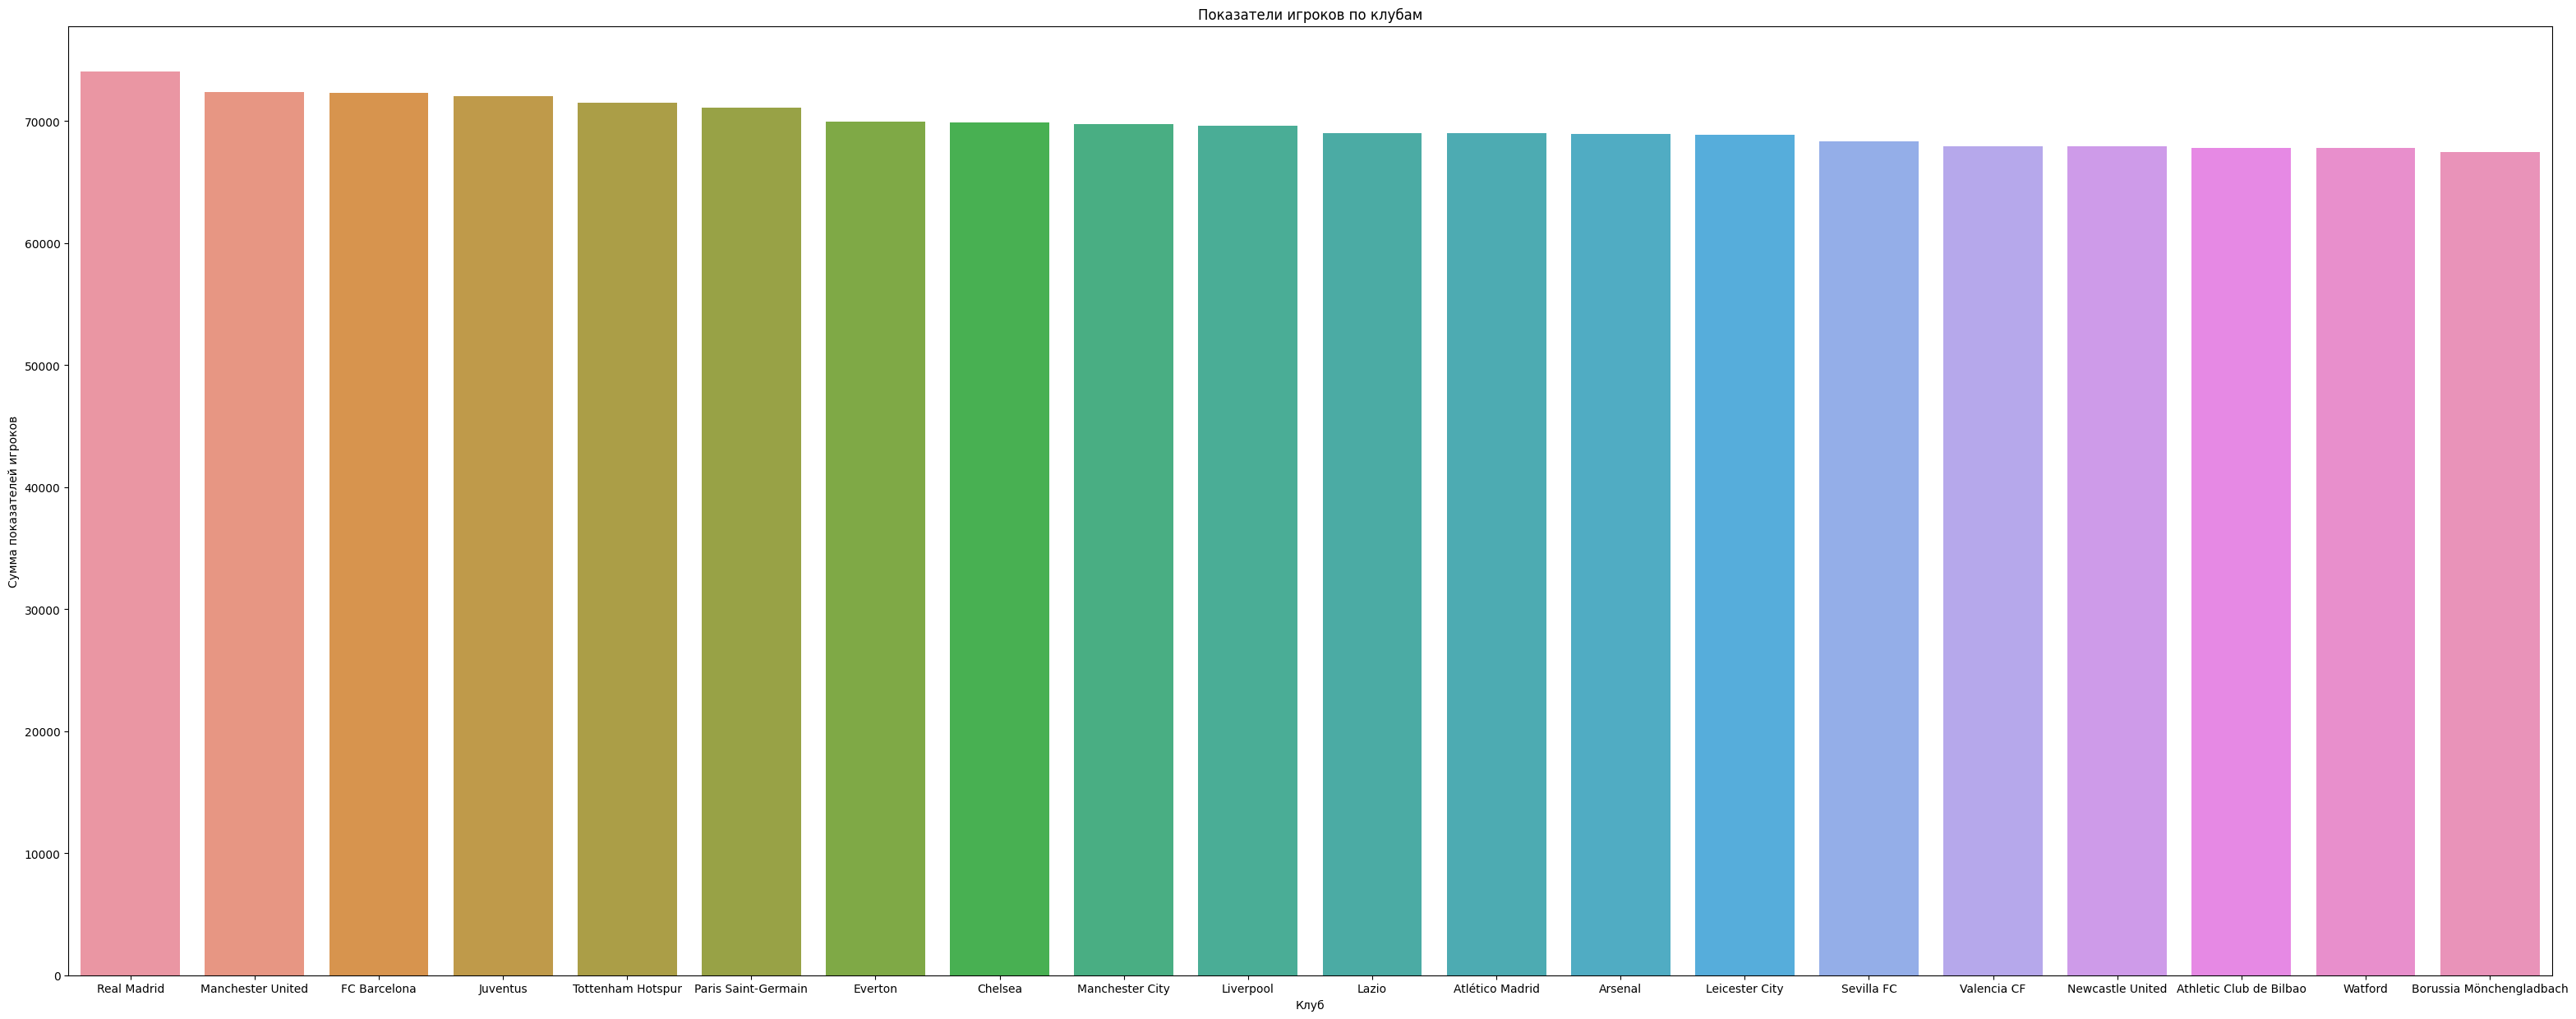

In [74]:
fig, ax = plt.subplots(figsize=(39, 15))
 
sns.barplot(data=df_7.head(20), x="club", y="total_score")
ax.set(xlabel='Клуб', ylabel='Сумма показателей игроков', title='Показатели игроков по клубам')
plt.show()

# Гипотеза 7. 
## Более успешные футболисты начинают карьеру в возрасте близком к 20 годам, следовательно занимают места в самых успешных клубах.

In [75]:
df_8 = df.copy()
df_8['in_play'] = 2020 - df_8.joined.dt.year
df_8['age_started'] = df_8['age'] - df_8['in_play']
df_8 = df_8.groupby('club').agg({'age_started':'median'}).reset_index().dropna()

In [76]:
football_clubs_2020 = [
    "Liverpool FC",
    "FC Barcelona",
    "Bayern Munich",
    "Manchester City",
    "Paris Saint-Germain",
    "Real Madrid",
    "Juventus",
    "Atlético Madrid",
    "Borussia Dortmund",
    "Chelsea FC",
    "Inter Milan",
    "Manchester United",
    "RB Leipzig",
    "Napoli",
    "Tottenham Hotspur",
    "Arsenal",
    "AC Milan",
    "Sevilla FC",
    "Leicester City",
    "Ajax Amsterdam"
]

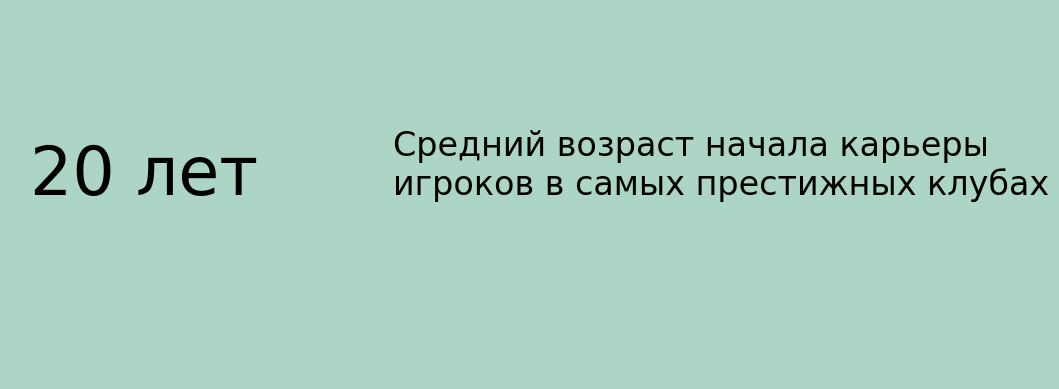

In [77]:
number = int(df_8[df_8.club.isin(football_clubs_2020)].age_started.mean())
label = 'Средний возраст начала карьеры \nигроков в самых престижных клубах'

fig, ax = plt.subplots(facecolor='#ACD5C6')

ax.plot(0, number, 'bo', markersize=0)

ax.text(0, number, str(number) + ' лет', ha='right', fontsize=48)
ax.text(0.03, number, label, ha='left', fontsize=24)

ax.axis('off')

plt.show()

# Гипотеза 8. 
## Игроки с высокой международной репутацией входят в сборную страны.

In [78]:
df_3 = df.copy()
df_3['national_team'] = np.where(~df_3.nation_position.isnull(), True, False)
df_3 = df_3.groupby('national_team').agg({'international_reputation': 'mean'}).reset_index()

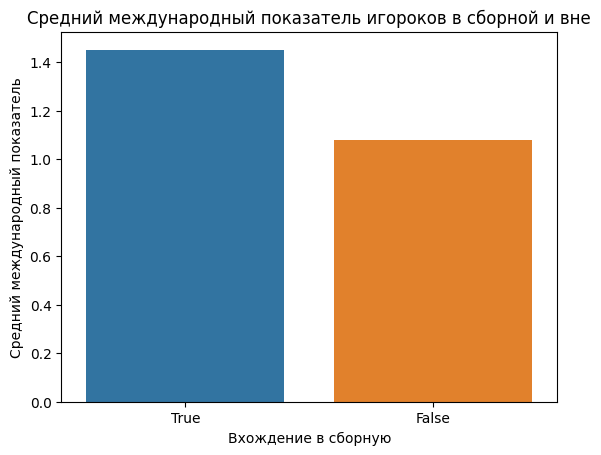

In [79]:
ax = sns.barplot(x='national_team', 
                 y='international_reputation', 
                 data=df_3, 
                 order=[True, False])
ax.set(xlabel='Вхождение в сборную', 
       ylabel='Средний международный показатель', 
       title='Средний международный показатель игороков в сборной и вне')
plt.show()

# Гипотеза 9.
Высокие показатели у более взрослых игроков.

In [80]:
df9 = df.groupby(df['dob'].dt.year)\
.agg({'sofifa_id' : 'count', 'pace' : 'mean', 'shooting' : 'mean', 'passing' : 'mean', 'dribbling' : 'mean', 'defending' : 'mean', 'physic' : 'mean'}).reset_index()
df9.sample(5)

dob  sofifa_id       pace   shooting    passing  dribbling  defending  \
16  1993       1329  70.073579  54.121237  58.940635  64.424749  52.512542   
20  1997       1454  69.404927  48.814473  54.934565  61.454965  49.801386   
19  1996       1374  70.141224  51.384490  56.633469  63.197551  50.467755   
11  1988        891  65.153942  56.565707  61.431790  64.371715  56.433041   
22  1999       1193  67.991597  46.892624  51.543417  58.932773  44.917834   

       physic  
16  67.186455  
20  62.210162  
19  63.697143  
11  69.804756  
22  57.357610

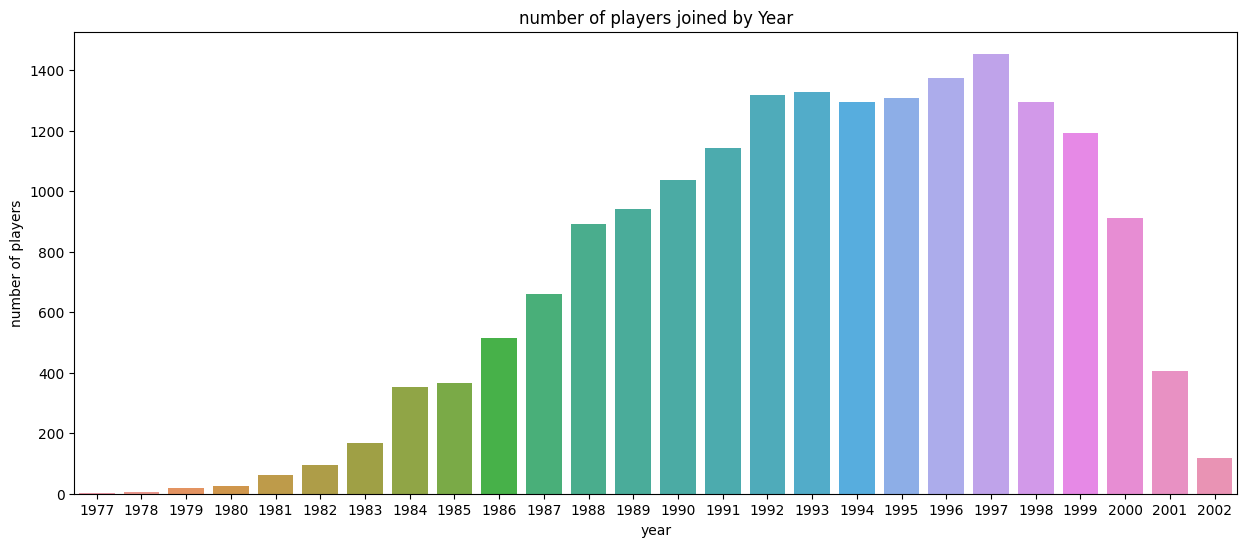

In [81]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='sofifa_id', data = df9)
plt.xlabel('year')
plt.ylabel('number of players')
plt.title('number of players joined by Year')
plt.show()

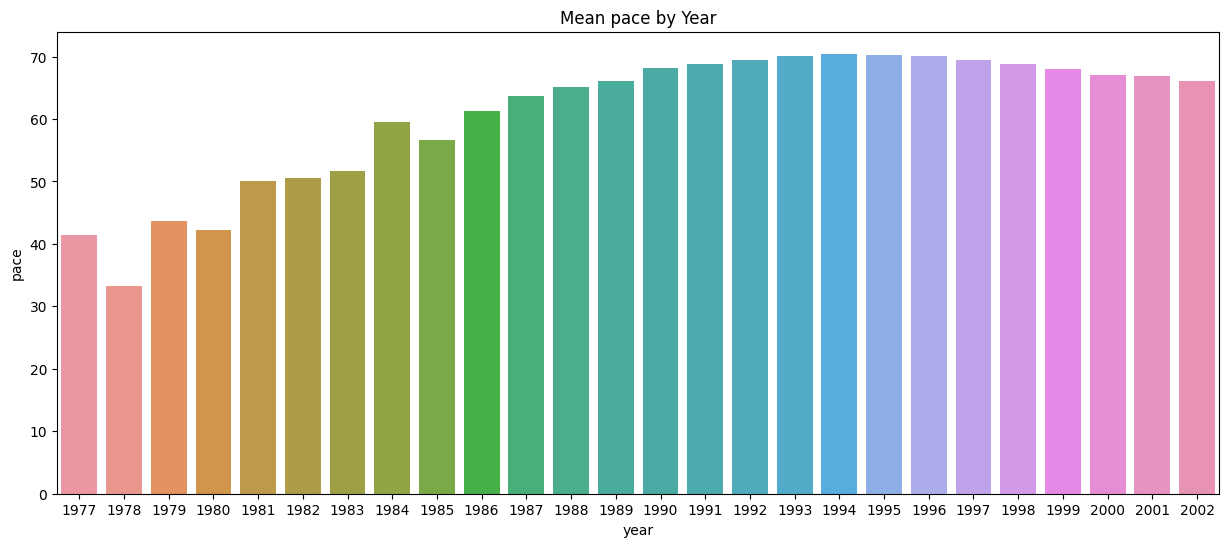

In [82]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='pace', data = df9)
plt.xlabel('year')
plt.ylabel('pace')
plt.title('Mean pace by Year')
plt.show()

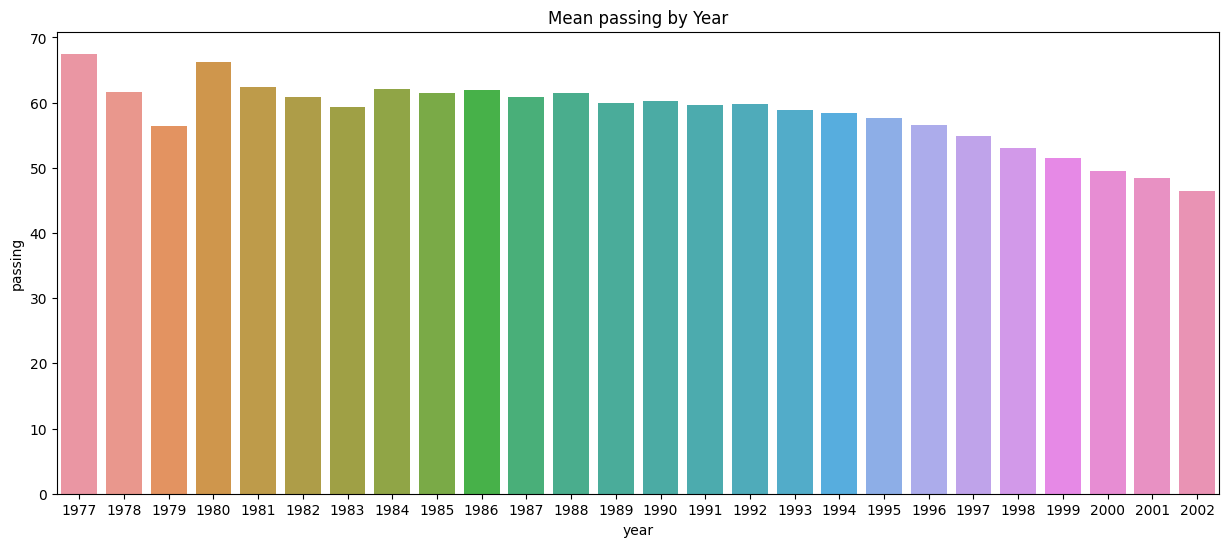

In [83]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='passing', data = df9)
plt.xlabel('year')
plt.ylabel('passing')
plt.title('Mean passing by Year')
plt.show()

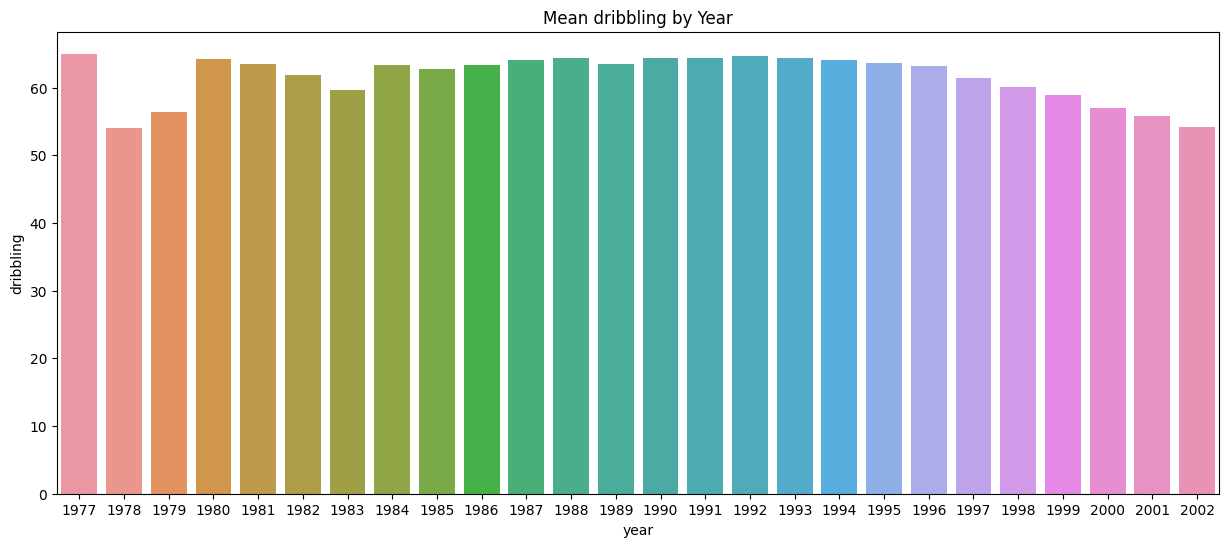

In [84]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='dribbling', data = df9)
plt.xlabel('year')
plt.ylabel('dribbling')
plt.title('Mean dribbling by Year')
plt.show()

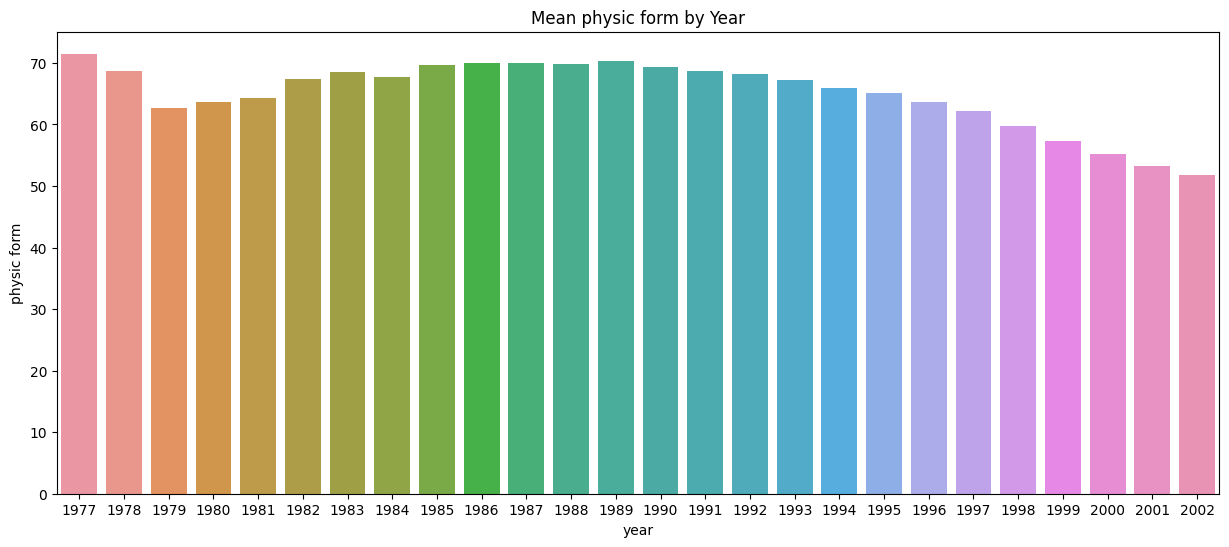

In [85]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='physic', data = df9)
plt.xlabel('year')
plt.ylabel('physic form')
plt.title('Mean physic form by Year')
plt.show()

Вывод: 


1.   Гипотеза верна лишь отчасти
2.   Скорость у более 'старых' игроков заметно слабеет. Умение же давать пасы наоборот с возрастом только растет
3.   Физическая форма и дрибблинг растут с опытом но со временем эти показатели упираются в потолок и начинают демонстрировать падение.



# Гипотеза 10

Чем раньше родился футболист тем он более успешен.

In [86]:
df10 = df.groupby(df['dob'].dt.month).agg({'sofifa_id' : 'count', 'wage_eur' : 'mean'}).reset_index()
df101 = df.groupby(df['dob'].dt.month).agg({ 'wage_eur' : 'median'}).reset_index()
df10 = df10.rename({'wage_eur' : 'mean_wage'}, axis = 1)
df101 = df101.rename({'wage_eur' : 'median_wage'}, axis = 1)
df10 = df10.merge(df101, on='dob')
df10.sample(5)

dob  sofifa_id    mean_wage  median_wage
7    8       1361  9332.108744       3000.0
4    5       1573  9494.596313       3000.0
6    7       1449  9204.278813       3000.0
3    4       1621  9062.924121       3000.0
2    3       1819  9439.252336       3000.0

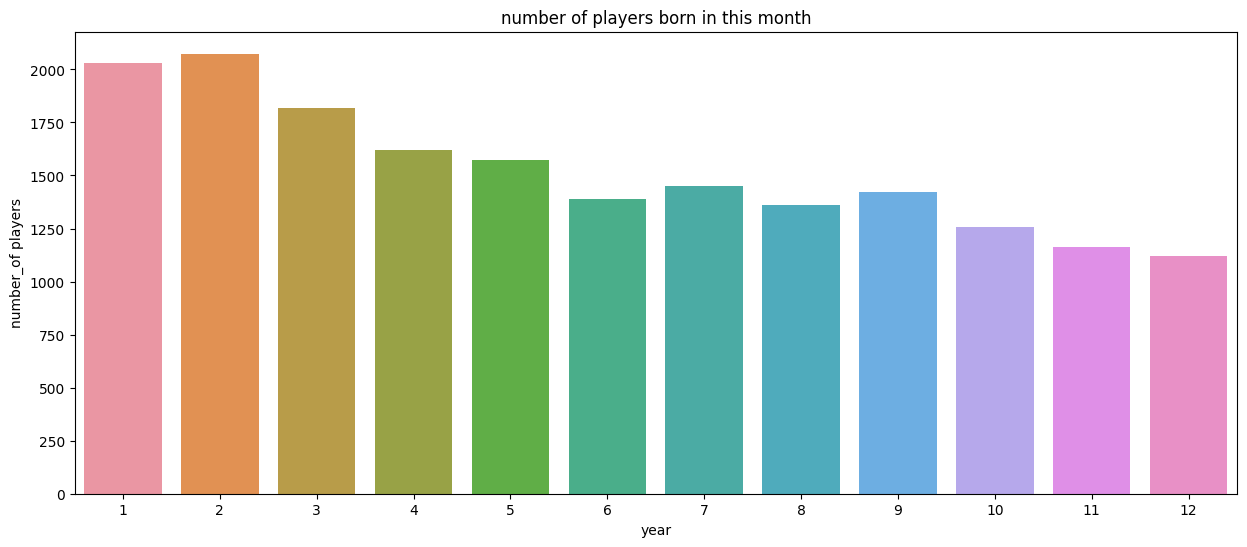

In [87]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='sofifa_id', data = df10)
plt.xlabel('year')
plt.ylabel('number_of players')
plt.title('number of players born in this month')
plt.show()

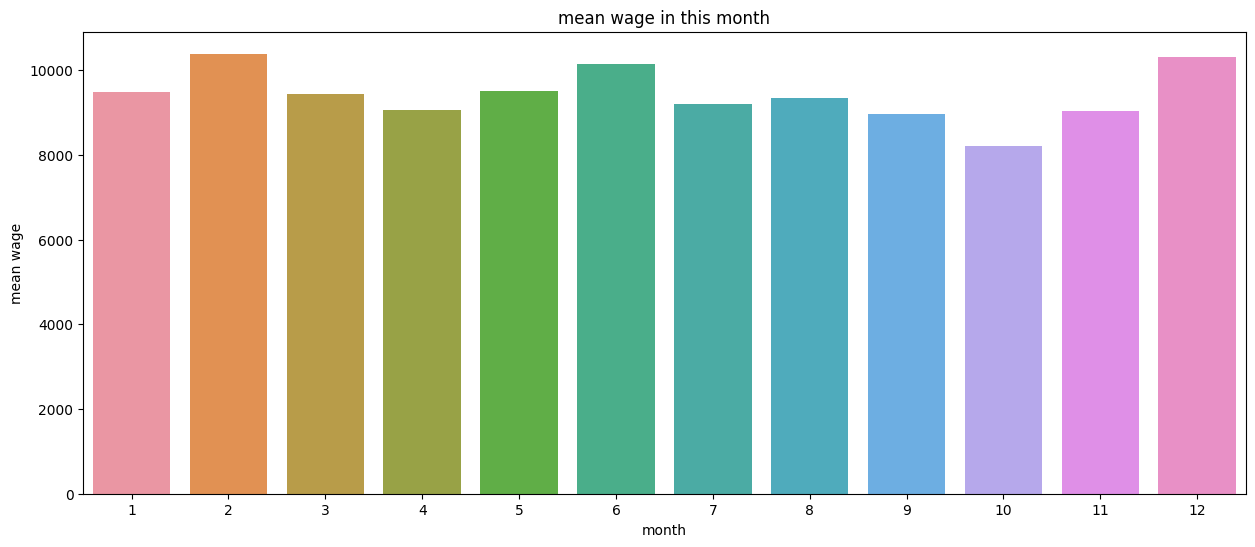

In [88]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='mean_wage', data = df10)
plt.xlabel('month')
plt.ylabel('mean wage')
plt.title('mean wage in this month')
plt.show()

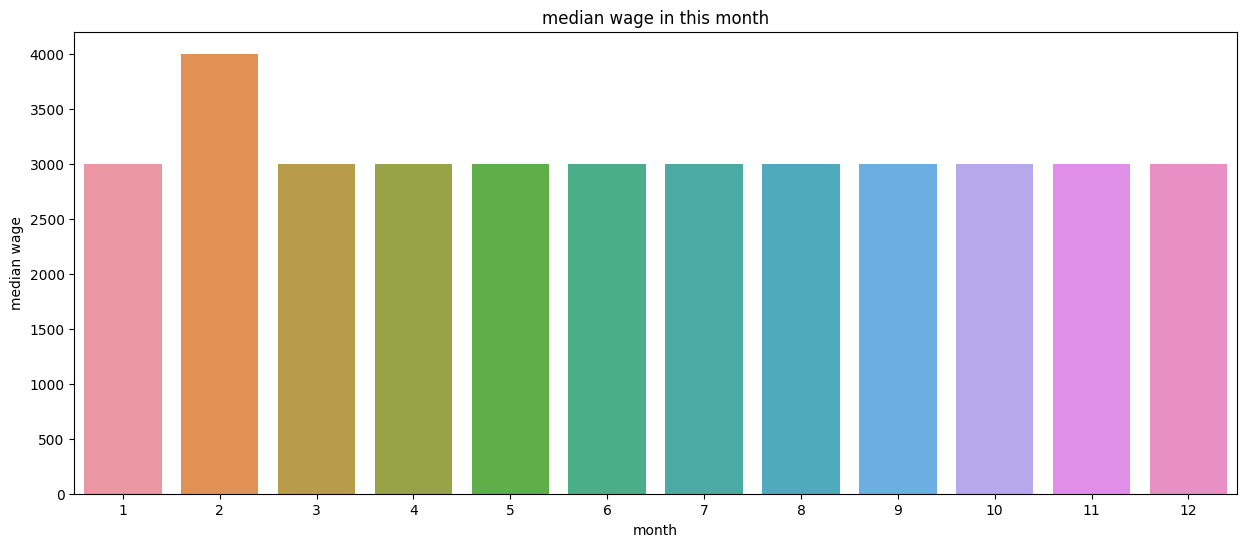

In [89]:
plt.figure(figsize=(15,6))
sns.barplot(x='dob', y='median_wage', data = df10)
plt.xlabel('month')
plt.ylabel('median wage')
plt.title('median wage in this month')
plt.show()

Можно запросто заметить что какой-то значимой разницы между месяцами нет, особенно хорошо это заметно на графике с медианой.
Но, если знать, что спортсмены попавшие в fifa уже сами по себе успешны, то получается что гипотеза подтвердилась, т.к. количество игроков по месяцам демонстрирует стаблиьное падение. и игроков, родившихся в январе почти в два раза больше, чем в декабре

# Гипотеза 11

В странах Европы показатели спортсменов лучше, т.к. там развитая футбольная культура

In [90]:
df11 = df[['nationality','overall']]
#df11['total_score'] = df[['skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].sum(axis=1)



In [91]:
df11['nationality'] = df11['nationality'].replace(['England', 'Wales', 'Northern Ireland', 'Scotland'],'United Kingdom')
df11 = df11.groupby('nationality').agg({'overall' : 'mean'}).reset_index()

<ipython-input-91-2a376c7607ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
data11 = dict(
        type = 'choropleth',
        colorscale = 'thermal',
        locations = df11['nationality'],
        locationmode = "country names",
        z = df11['overall'],
        text = df11['nationality'],
        colorbar = {'title' : 'Средние показатели'})

In [93]:
layout = dict(title = 'Nationality Distribution',
              geo = dict(projection = {'type':'mercator'}))

choromap = go.Figure(data = [data11],layout = layout)
iplot(choromap,validate=False)

Видно, что лучшие характеристики встречаются у людей которые живут южнее. При этом Европа не выглядит примечательной на фоне других стран

---



# Гипотеза 12

Показатели вратарей коррелируют друг с другом

In [94]:
import plotly.graph_objects as go

selected_columns = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_positioning']

df12 = df[selected_columns].dropna()

df12_corr = df12.corr()

fig = go.Figure(data=go.Heatmap(
                   z=df12_corr,
                   x=selected_columns,
                   y=selected_columns,
                   hoverongaps = False,
                   colorscale='Viridis'))

fig.show()

Корреляция нескоько проседает на ударах, но все равно остается большой. Это значит что параметры взаимосвязаны.

# Гипотеза 13

Показатель слабой ноги у игроков с правой ведущей ногой выше, чем у игроков с левой ведущей.

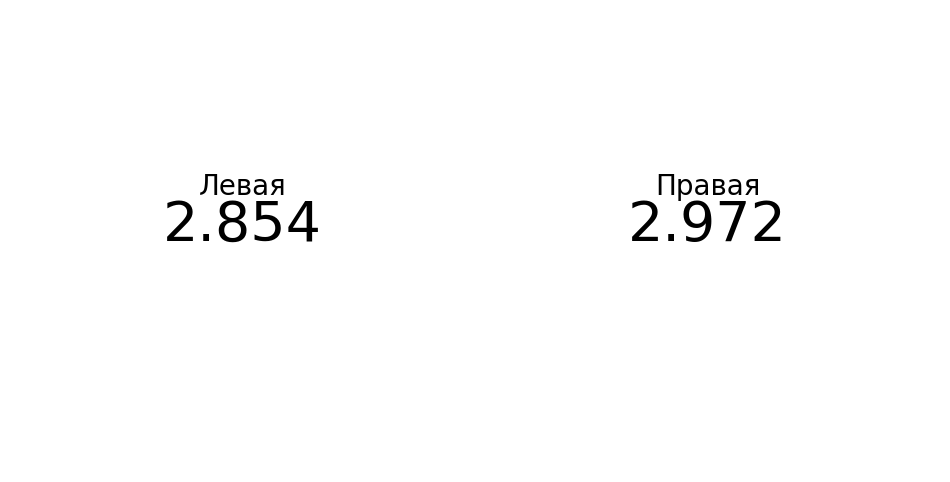

In [95]:
df13 = df.groupby(df['preferred_foot']).agg({'weak_foot' : 'mean'})
df13_left = round(df13.loc['Left']['weak_foot'], 3)
df13_right = round(df13.loc['Right']['weak_foot'], 3)

plt.figure(figsize=(12,6))

plt.text(0.25, 0.5, str(df13_left), fontsize=40, ha='center')
plt.text(0.25, 0.6, 'Левая', fontsize=20, ha='center')

plt.text(0.75, 0.5, str(df13_right), fontsize=40, ha='center')
plt.text(0.75, 0.6, 'Правая', fontsize=20, ha='center')

plt.axis('off')
plt.show()

Вывод: гипотеза подтвердилась

# Гипотеза 14

Вратари выше остальных ролей, а защитники худее

In [99]:
import joypy
df14 = df[['weight_kg', 'height_cm', 'team_position']]

df14['team_position'] = df14['team_position'].replace(['LB', 'RB', 'LCB', 'RCB', 'CB', 'LWB', 'RWB'], 'Defense')
df14['team_position'] = df14['team_position'].replace(['RM', 'LM', 'LAM', 'RAM', 'CAM', 'LCM', 'RCM', 'CM', 'LDM', 'RDM', 'CDM'], 'Semi-defense')
df14['team_position'] = df14['team_position'].replace(['LF', 'RF', 'CF', 'ST', 'RW', 'LW', 'LS', 'RS'], 'Atack')

<ipython-input-99-62a36fdac35c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-62a36fdac35c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-62a36fdac35c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1280x800 with 0 Axes>

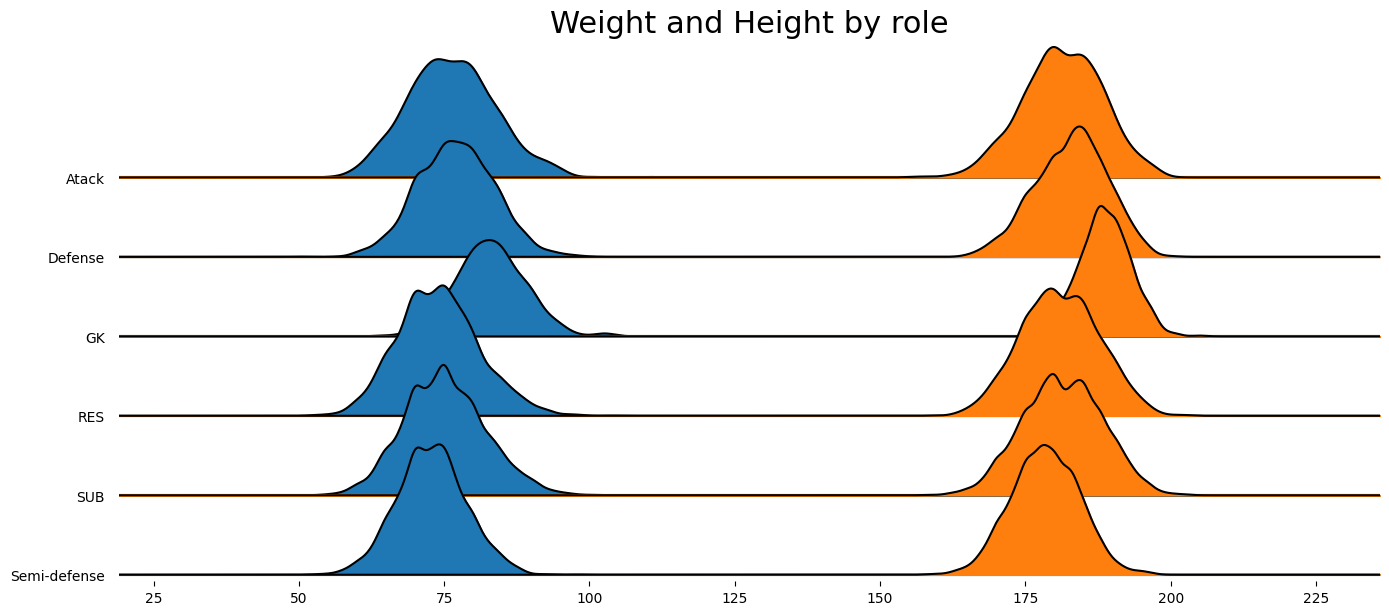

In [100]:
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df14, column=['weight_kg', 'height_cm'], by="team_position", ylim='own', figsize=(14,6))

plt.title('Weight and Height by role', fontsize=22)
plt.show()

Вес выбивается только у вратарей, но также они заметно выше. Таже можно заметить, что защитники выше напдающих и полузащитников

# Гипотеза 15

Месси лучше Роналдо по основным характеристикам

In [107]:
a = df[df["short_name"] == 'L. Messi']
a1 = df[df["short_name"] == 'Cristiano Ronaldo']


trace0 = go.Scatterpolar(
  r = [a.iloc[0]['pace'], a.iloc[0]['shooting'], a.iloc[0]['passing'], a.iloc[0]['dribbling'], a.iloc[0]['defending'], a.iloc[0]['physic'], a.iloc[0]['overall']],
  theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
  fill = 'toself',
  name = a['short_name'].values[0]
)

trace1 = go.Scatterpolar(
  r = [a1.iloc[0]['pace'], a1.iloc[0]['shooting'], a1.iloc[0]['passing'], a1.iloc[0]['dribbling'], a1.iloc[0]['defending'], a1.iloc[0]['physic'], a1.iloc[0]['overall']],
  theta = ['Pace','Shooting','Passing','Dribbling','Defending','Physic','Overall'],
  fill = 'toself',
  name = a1['short_name'].values[0]
)

data = [trace0, trace1]



In [112]:
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 100]
    )
  ),
  template="plotly_white",  
  showlegend = True,
  font=dict(family='Cambria, monospace', size=12, color='#000000'),
  title = "Comparison between Messi and Ronaldo".format(a.short_name.values[0])
    
)
fig = go.Figure(data=data, layout=layout)
fig.show()

Гипотеза подвтердилась лишь отчасти. 3 из 6 основных характеристик у Месси выше, 2 ниже и одна такая же. Общий балл ('overall') больше незначительно

# Гипотеза 16

В Реал мадриде больше всего футболистов из топ 50

In [113]:
df16 = df.sort_values(by=["overall"], ascending=False).head(50)

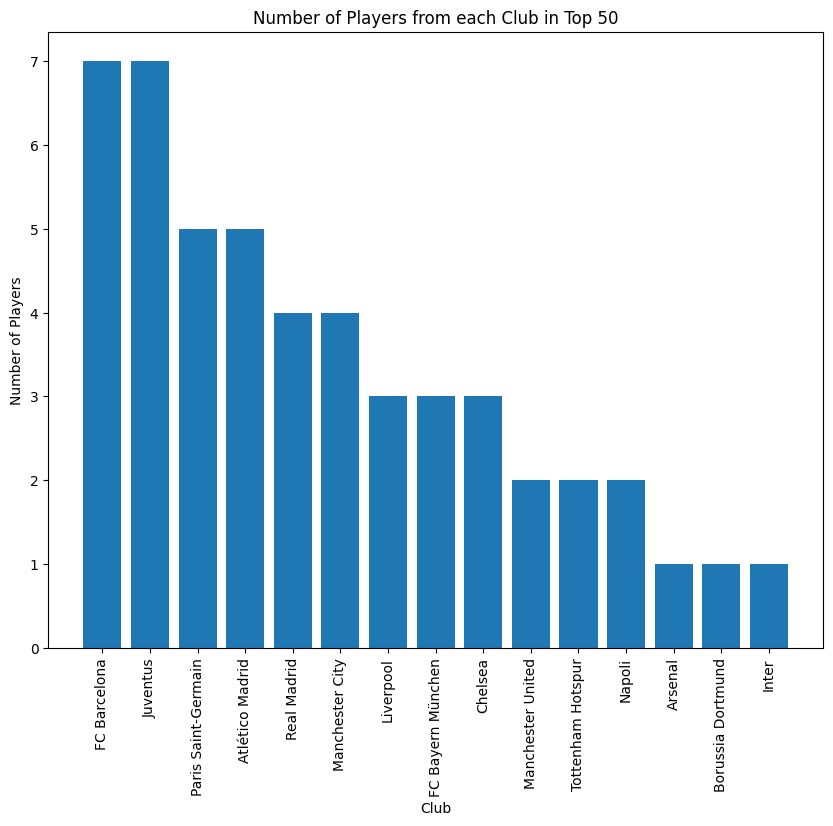

In [116]:
plt.figure(figsize=(10,8))
plt.bar(df16['club'].unique(), df16['club'].value_counts())
plt.title('Number of Players from each Club in Top 50')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

Гипотеза не подвтвердилась. Больше всего игроков в Барселоне и Ювентусе